In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from ipywidgets import interactive

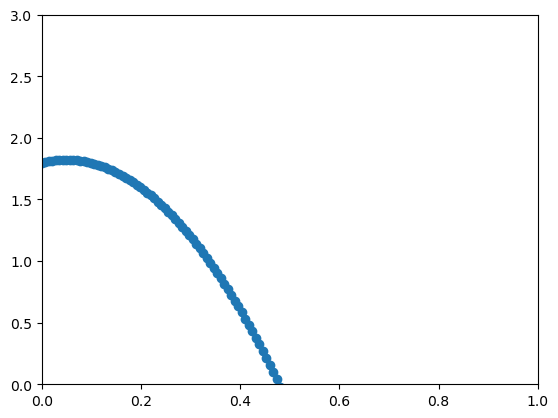

interactive(children=(IntSlider(value=2, description='h', max=3), IntSlider(value=45, description='deg', max=9…

In [11]:
def ballthrow(h, deg):
    x = 0
    y = h 
    v = 1
    g = 9.8
    theta = np.radians(deg)
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    t = 0
    dt = 0.01
    T = [t]
    X = [x]
    Y = [y]
    while y >= 0:
        t += dt 
        vx += 0
        vy += -g*dt 
        x += vx*dt
        y += vy*dt
        T.append(t)
        X.append(x)
        Y.append(y)
    plt.scatter(X, Y)
    plt.ylim(0, 3)
    plt.xlim(0, 1)
    plt.show()
ballthrow(1.8, 45)
interactive(ballthrow, 
            h = widgets.IntSlider(min=0, max=3, step=1, value=2), 
            deg = widgets.IntSlider(min=0, max=90,step=5,value=45))


0 6.388765649999399
1 6.568332462529439
2 6.750685622711628
3 6.935569525583427
4 7.122703632235595
5 7.311783458005116
6 7.502481822351639
7 7.694450334470926
8 7.8873210836089
9 8.080708499378034
10 8.274211345223776
11 8.46741480752188
12 8.659892643498884
13 8.851209353077868
14 9.040922342631946
15 9.228584052225903
16 9.413744021984968
17 9.595950877507152
18 9.774754218517803
19 9.949706399075966
20 10.120364191445654
21 10.28629032914765
22 10.447054927652475
23 10.60223678364039
24 10.751424555743755
25 10.894217831225703
26 11.030228084176198
27 11.159079531570043
28 11.280409893983448
29 11.393871067959038
30 11.499129716994306
31 11.59586778795158
32 11.68378295939043
33 11.76258902794134
34 11.832016238402698
35 11.891811562776239
36 11.94173893297851
37 11.98157943149255
38 12.011131443766823
39 12.030210775734167
40 12.038650739418932
41 12.036302209227477
42 12.023033651178178
43 11.998731127021564
44 11.96329827492925
45 11.91665626818939
46 11.858743753135995
47 11.78

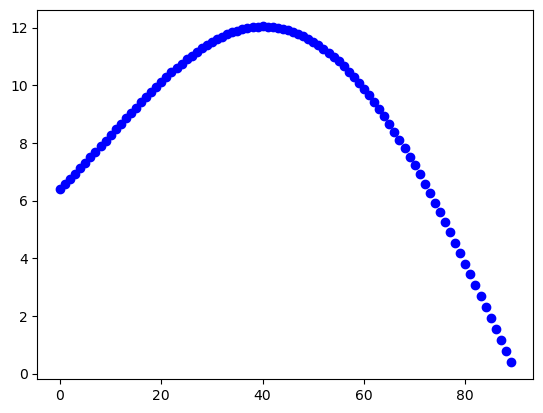

In [23]:
from scipy.integrate import solve_ivp
import numpy as np
from numpy import radians, sin, cos, tan, sqrt
import matplotlib.pyplot as plt

h = 2.0
g = 9.8

def deriv(t, z):
    vx, vy, x, y = z
    return [0, -g, vx, vy]

def ground(t, z):
    return z[3]+0.1

ground.terminal = True

def solve(deg, v0=1):
    t1 = 2
    tspan = [0, t1]
    teval = np.linspace(0, t1, 200)
    theta = radians(deg)
    y0 = [v0*cos(theta), v0*sin(theta), 0, h]
    sol = solve_ivp(deriv, tspan, y0, 'RK45',teval, events=ground) 
    #plt.plot(sol.t, sol.y[3])
    print(deg, sol.y[2][-1])
    plt.scatter(deg, sol.y[2][-1],c='b')

def solve2(deg, v0=1):
    theta = radians(deg)
    a = g/(2*v0**2*cos(theta)**2)
    b = -tan(theta)
    c = -h 
    det = b**2-4*a*c
    x = (-b+sqrt(det))/2/a
    print(deg, x)
    plt.scatter(deg, x, c='b')

for d in range(0, 90):
    solve2(d, 10)